# ST0249 AI & Machine Learning 
## CA1 Assignment (Titanic Shipwreck Prediction) 

#### Name: Choo Weng Yan
#### Class: DIT/FT/2A/14
#### Admission Number: p1940208

In [1]:
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
import sklearn
from sklearn import datasets 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

#show the versions of the libraries that are currently in use
message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.20.3
Numpy version=1.16.2
Pandas version=0.23.4
Seaborn version=0.9.0
Python version=3.6.6


In [5]:
# Import train data 
df_train = pd.read_csv("train.csv")
df_train[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
1,2,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#Import test data
df_test = pd.read_csv("test.csv")
df_test[:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,6,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
1,8,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


#### How is your prediction task defined? And what is the meaning of the output variable?

My prediction task is to predict which passengers/what sort of people would survived in the Titanic Shipwerck by using machine learning tool based on the data given. 

The meaning of output variable is 'Survived' column, defined by '1' (Survived) or '0' (Did not survive).

#### Did you bring in any additional sources of data?

I have did some background research by watching the movie 'Titanic' which is about the ill-fated maiden voyage of the RMS Titanic. This helped me to gain a deeper understanding about the incident and also gain deeper insights on how the community worked and the ancient cluture in the era of 1912. Besides, I have also went to some websites like wikipedia to find out more about the disaster.

# Exploratory Data Analysis

In [7]:
#Showing all the information about the dataset

msg="Information of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.info())
print()

msg="Columns in the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.columns)
print()

msg="Shape of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.shape)
print()

msg="Descriptive statistical summary of the train dataset is shown below: "
print("*"*len(msg))
print(msg)
print("*"*len(msg))
df_train.describe()

********************************
Information of the Train Dataset
********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 12 columns):
PassengerId    897 non-null int64
Survived       897 non-null int64
Pclass         897 non-null int64
Name           897 non-null object
Sex            897 non-null object
Age            724 non-null float64
SibSp          897 non-null int64
Parch          897 non-null int64
Ticket         897 non-null object
Fare           897 non-null float64
Cabin          212 non-null object
Embarked       895 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 84.2+ KB
None

****************************
Columns in the Train Dataset
****************************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**************************
Shape of the Train Dataset
***************

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,897.000000,897.000000,897.000000,724.000000,897.000000,897.000000,897.000000
mean,648.253066,0.387960,2.280936,30.255525,0.519509,0.416945,34.311148
std,378.351039,0.487557,0.841982,14.574115,1.091724,0.901426,52.446742
min,1.000000,0.000000,1.000000,0.333300,0.000000,0.000000,0.000000
25%,317.000000,0.000000,1.000000,21.000000,0.000000,0.000000,7.925000
50%,644.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.050000
75%,981.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.387500
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#List out the missing values 

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

It shows that "Age" and the "Cabin" has the most number of null values among the dataset which is 173 and 685 while there's only 2 null values for "Embarked".

In [9]:
# Seperated the columns into catergorical variables and numerical variables

num_vars=list(df_train.columns[df_train.dtypes != "object"])
cat_vars=list(df_train.columns[df_train.dtypes == "object"])
print("Categorical Variables: ",cat_vars)
print("Numerical Variables: ",num_vars)

Categorical Variables:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


After seperating the columns, it shows that 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' are in Categorical variables. 

Whereas 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch' and 'Fare' are in Numerical variables.

Text(0.5, 1.0, 'Distrubtion of Age of Passengers')

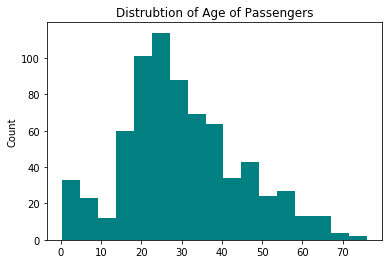

In [10]:
#Show the Age Distribution of passengers in the dataset

plt.hist(df_train['Age'], bins=17,color='teal')
plt.ylabel('Count')
plt.title('Distrubtion of Age of Passengers')

This histogram is slightly positively skewed. It shows that many passengers on the Titanic are age of about 20 to 40 years old. 

The youngest passengers aboard are mostly babies (around 0 years old) while the oldest passengers aboard are almost 70 years old.

Since this histogram is positively skewed, the median of the age of passengers will be used to fill up the missing values. 

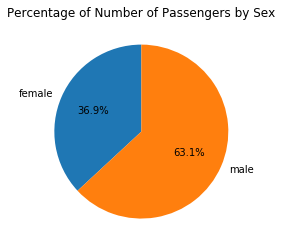

In [11]:
#Number of males and females (counted in Percentage)

train_f=df_train['Sex'].value_counts()[['female']].sum()
train_m=df_train['Sex'].value_counts()[['male']].sum()

train_num=[train_f,train_m]
train_sex=['female','male']

plt.pie(train_num,labels=train_sex,startangle=90,autopct='%.1f%%')
plt.title('Percentage of Number of Passengers by Sex')

plt.show()

The pie chart shows the Percentage of the Number of Passengers based on Sex.

According to the pie chart above, it shows that most of the passengers who aboarded the ship are male (63.1%) and 36.9% of them are female. 

Text(0.5, 1.0, 'Age of Passengers by Sex')

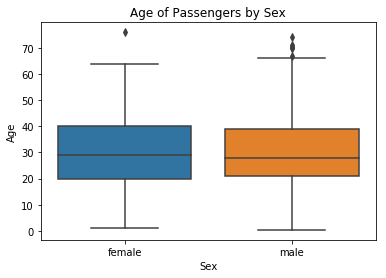

In [12]:
#Average Age for Respective Sex 
sns.boxplot(y='Age',x='Sex',data=df_train)
plt.title('Age of Passengers by Sex')

After getting know the average of passengers and the gender, a boxplot that shows the age of passengers for both sex is created. 

It shows that the average age of passengers for both gender are about the same which is around 28 and 30 years old. 

It also shows that there are more outliers for male compared to the female.

Text(0, 0.5, 'Number of Passengers')

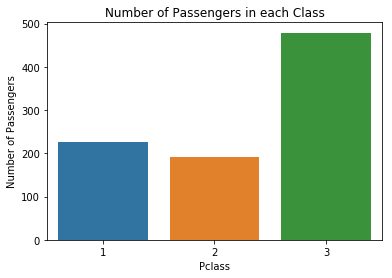

In [13]:
## Amount of Passengers in each Pclass

sns.countplot(df_train['Pclass'], data=df_train)
plt.title('Number of Passengers in each Class')
plt.ylabel('Number of Passengers')

This bar graph shows the Number of Passengers in each Class. 

According to the graph, 3rd Class has the highest number of passengers among all the three classes while 2nd Class has the lowest number of passengers which is about 180. 

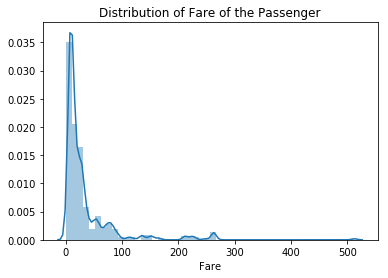

In [14]:
#Distribution of Ticket Fare 

sns.distplot(df_train['Fare'])
plt.title('Distribution of Fare of the Passenger')
plt.show()

This distribution plot shows the Distribution of Fare Ticket among the passengers. 

The distribution plot is positively skewed and it shows that most of the fare ticket bought by the passengers are below $50. There's only a few outliers telling us that some of the passengers bought the fare ticket at a higher rate compared to other passengers.

In [15]:
# correlation between the variables in the dataset 

corr = df_train.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr.Survived)

Survived       1.000000
Fare           0.260102
Parch          0.083555
Age           -0.025869
SibSp         -0.043591
PassengerId   -0.275122
Pclass        -0.341922
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Correlation between Variables')

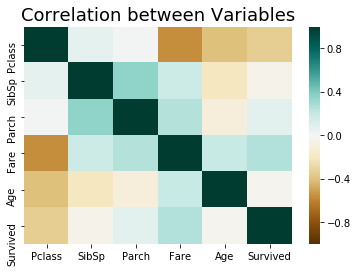

<Figure size 432x432 with 0 Axes>

In [16]:
#Correlation between variables in the dataset
ax = plt.axes()

sns.heatmap(df_train[["Pclass","SibSp","Parch","Fare","Age","Survived"]].corr(),annot=False, fmt = ".2f", cmap = "BrBG", vmin=-1, ax=ax)
plt.figure(figsize=(6,6))
ax.set_title('Correlation between Variables', fontsize=18)

The heat map above shows the correlation between the variables in dataset. 

According to the heatmap, 'SibSp', 'Parch', 'Fare' has higher correlation compared with other attributes.
There is a high correlation between 'Fare' and 'Pclass' as well. 

#### Factors affecting Survival Rate/ Relationships

Sex     Survived
female  0            90
        1           241
male    0           459
        1           107
Name: Survived, dtype: int64


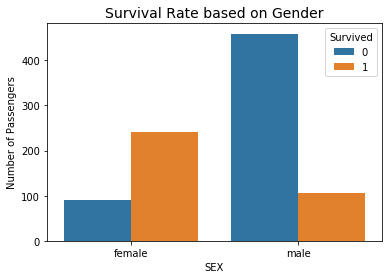

In [17]:
#gender - survival (Find out which gender has a higher survival rate)

print(df_train.groupby(['Sex', 'Survived'])['Survived'].count())

sns.countplot('Sex',hue='Survived',data=df_train)
plt.title("Survival Rate based on Gender",fontsize=14)
plt.xlabel("SEX")
plt.ylabel("Number of Passengers")
plt.show()

This countplot shows the Survival Rate based on Gender. 

According to the countplot, it shows that female passengers has a higher survival rate than the male passengers. 
Male passengers are more likely not able to survive as female passengers survived in much higher proportions than the males. 

Text(0.5, 1.02, 'Survival Rate of each Class Based on Sex')

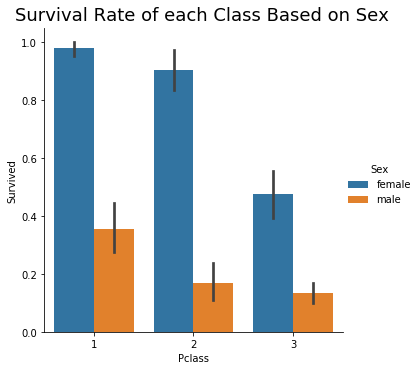

In [18]:
#Survival Rate of Passengers based on Sex and Pclass

ax1=sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=df_train)
ax1.fig.suptitle('Survival Rate of each Class Based on Sex', fontsize=18, y=1.02)

The bar chart above shows the Survival Rate of Passengers in each Class. 

It shows that 1st Class passengers have the highest survival rate among the three classes while 3rd Class passengers have the lowest survival rate. The survival rate for 1st and 2nd Class female passengers are about the same but the survival rate of female passengers in 3rd class is much lower than the female passengers in 1st class. 

Also, from this graph, it shows that there is a big difference between the survival rate of female passengers and male passengers in all the classes. 

Male passengers in 1st Class have a higher chance to survive compared to other male passengers in 2nd Class and 3rd Class.

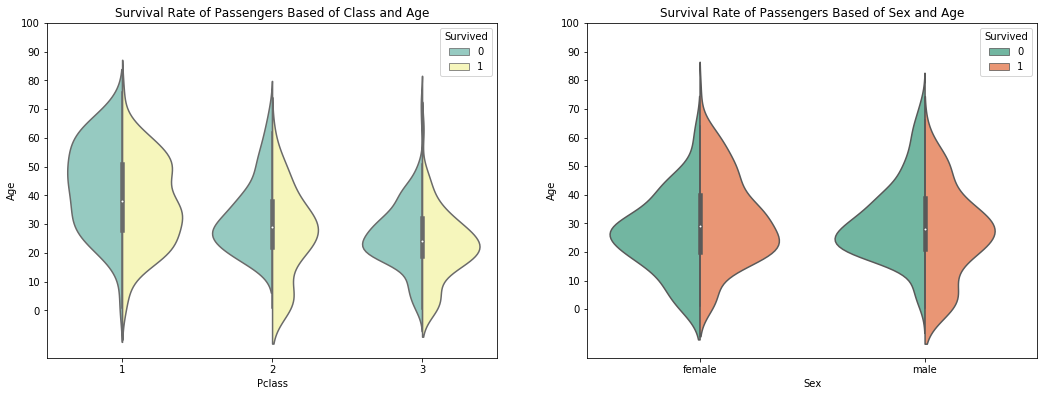

In [19]:
#Survival Rate of Passengers based on Age -- Sex and Pclass) 

f,ax=plt.subplots(1,2,figsize=(10,6))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,split=True,ax=ax[0], palette="Set3")
ax[0].set_title('Survival Rate of Passengers Based of Class and Age')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue='Survived', data=df_train,split=True,ax=ax[1],palette="Set2")
ax[1].set_title('Survival Rate of Passengers Based of Sex and Age')
ax[1].set_yticks(range(0,110,10))

plt.subplots_adjust(right=1.5, top=0.9)
plt.show()

The two violin plots above shows the Survival Rate of Passengers Based on Class, Sex and Age. 

Based on the first violin plot (left), the number of children aged below 15 years old increases from 1st Class to 3rd Class and 3rd Class has the highest number of children passengers. The violinplot shows that children passengers below 15 years old in 2nd Class and 3rd Class has higher survival rate compared to the adults passengers. 

Based on the second violin plot (right), female passengers aged 20-35 years old has a higher survival rate whereas the survival rate for male passengers aged 20-40 years old has is lower as the peak for '0' (Died) is higher than the '1' (Survived).

Text(0.5, 1.0, 'Ticket Fare and Survival Rate')

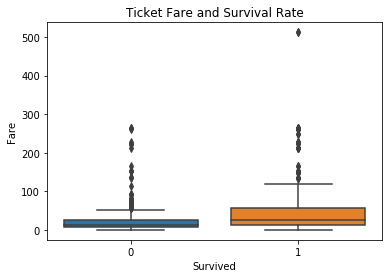

In [20]:
#Boxplot - Fare Ticket and Survival Rate 

sns.boxplot(x=df_train['Survived'],y=df_train['Fare'],data=df_train)
plt.title('Ticket Fare and Survival Rate')

Does Ticket Fare affects Survival Rate?

Based on the boxplot above, it shows that passengers who paid for higher fare have higher chance to survive, whereas passengers who paid lower than $30 have lower chance to survive.
It also shows that passenger who paid the highest ticket fare survived in the shipwreck.

Text(0.5, 1.0, 'Survival Rate of Passengers based on Fare and Pclass')

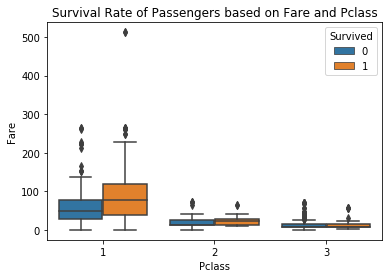

In [21]:
## Boxplot-- FARE AND CLASS 

sns.boxplot(x=df_train['Pclass'],y=df_train['Fare'],hue='Survived',data=df_train)
plt.title('Survival Rate of Passengers based on Fare and Pclass')

Does the ticket fare related to Pclass? 

Based on the boxplot above, it shows that 1st Class has the most expensive ticket fare while 3rd Class ticket fares are the cheapest. 
It also shows that passengers who bought the ticket with higher price have a higher chance of survival compared to the passengers who paid lesser for the ticket price. 

Text(0, 0.5, 'Number of Passengers')

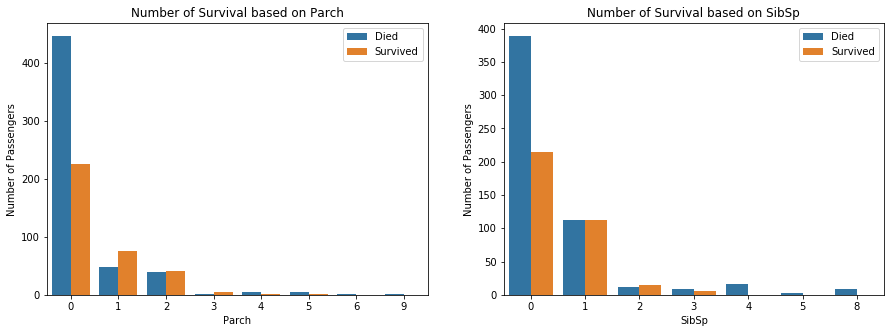

In [22]:
# Survival rate for passengers who have SibSp or Parch

feature=['Parch','SibSp']

fig, ax =plt.subplots(1,2, figsize=(15,5))
#fig.set_size_inches(15, 5)
sns.countplot(x='Parch', hue='Survived', data=df_train, ax=ax[0])
sns.countplot(x='SibSp', hue='Survived', data=df_train, ax=ax[1])

ax[0].legend(loc='upper right', labels=['Died','Survived'])
ax[1].legend(loc='upper right', labels=['Died','Survived'])

ax[0].set_title('Number of Survival based on Parch')
ax[1].set_title('Number of Survival based on SibSp')

ax[0].set_ylabel('Number of Passengers')
ax[1].set_ylabel('Number of Passengers')

The bar graphs above shows the Number of Survival based on SibSp and Parch.

Based on the first bar graph (left), it shows that passengers with 2 or lesser number of parents/children who aboard the Titanic have higher chance of survival compared to the passengers who have more than 2 parents/children who aboard the Titanic. It shows that the more number of parents or children, the lesser chance of survival.

Based on the second bar graph(right), the survival rate decreases as the number of siblings or spouses who aboard the Titanic increases. The graph also shows that the survival rate for passengers with one sibling/spouse is about 50% as the number of passengers with one sibling or spouse who died and survived are the same.

# Data Preparation

### Handle missing value

###### Embarked 

[Text(0, 0, 'Cherbourg'), Text(0, 0, 'Queenstown'), Text(0, 0, ' Southampton')]

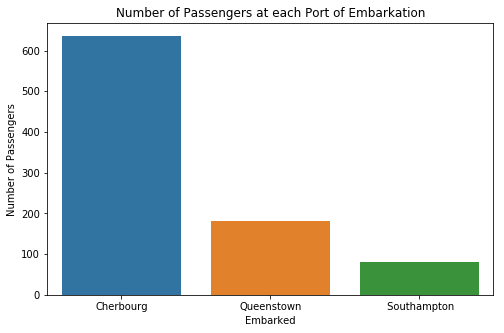

In [23]:
# Port of Embarktion

#fill in the missing values with 'mode' -> Port of embarkation with the highest number of passengers 
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
embarked_mode = df_train['Embarked'].mode()[0]


plt.figure(figsize=(8,5))
port=['Cherbourg','Queenstown',' Southampton']
ax_port=sns.countplot('Embarked',data=df_train)
plt.title('Number of Passengers at each Port of Embarkation')
plt.ylabel('Number of Passengers')
ax_port.set_xticklabels(port)

Since there is 2 missing values in "Embarked" columns, the null values are replaced with the port of embarkation with the highest number of passengers.
The bar graph above shows the number of passengers at each Port of Embarkation. 

Based on the graph, it shows that port at Cherbourg has the highest number passengers who embarked whereas port at Southampton has the lowest number of passengers who embarked. 

Hence, the null values in 'Embarked' columns will be filled with 'Cherbourg'.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


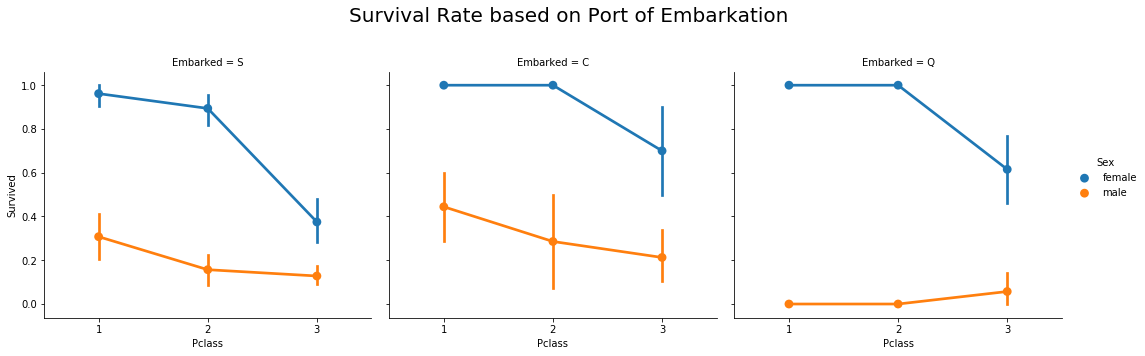

In [24]:
# Port of Embarktion

ax_embarked=sns.factorplot('Pclass','Survived','Sex',col='Embarked', data=df_train)
ax_embarked.fig.subplots_adjust(top=.8)
ax_embarked.fig.suptitle('Survival Rate based on Port of Embarkation',fontsize=20)
plt.show()

The factorplot above shows the Survival Rate of Passengers at Port of Embarktion grouped by Passengers' Class.

Based on the factorplot, passengers who embarked at port C (Cherbourg) has the highest survival rate among all the ports while passengers who embarked at Port S (Southampton) has the lowest survival rate. 

Besides that, the biggest difference between the survival rate of female passengers and male passengers is at Port of Embarkation Q (Queenstown). The survival rate for male passengers who embarked at Queenstown were almost 0-0.1

[Text(0, 0, ' Southampton'), Text(0, 0, 'Cherbourg'), Text(0, 0, 'Queenstown')]

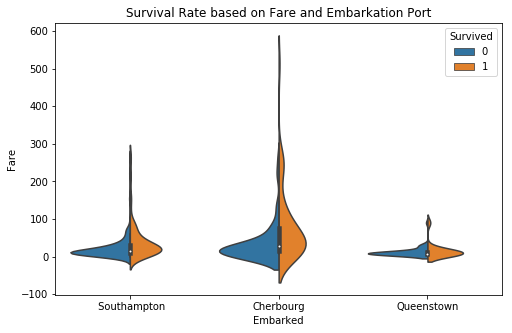

In [25]:
#Survival rate based on Fare and Port of Embarktion

plt.figure(figsize=(8,5))
ax2=sns.violinplot(x='Embarked',y='Fare', hue='Survived', data=df_train, split=True)
plt.title('Survival Rate based on Fare and Embarkation Port')
port=[' Southampton','Cherbourg','Queenstown']
ax2.set_xticklabels(port)


The violin plot above shows the Survival Rate at each Port of Embarkation and the Fare Ticket.

Based on the violin plot above, it shows that Port of Embarkation Cherbourg has the widest fare ticket range among the three ports whereas Port of Embarkation at Queenstown has the smallest fare ticket range.

It shows that passengers who paid highest price for the ticket have survived whereas most of the passengers who died are those who paid below $100. 

###### Age

In [26]:
# Age has some missing values which needs to be filled

#find out the median of the age of passengers
mean_age = df_train['Age'].mean()
print("Mean Age of Passengers: ",mean_age)

#replace missing value with mean(median) age 
data=[df_train,df_test]

for age in data:
    age['Age'].fillna(age['Age'].mean(), inplace=True)

Mean Age of Passengers:  30.25552486187846


In [27]:
#Checking purpose 

#check if all null values are being replaced 
print("Missing Values: \n", df_train.isnull().sum())

Missing Values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
dtype: int64


All the null values are being replaced except for 'Cabin' which will be done in the Feature Engineering section.

## Feature Engineering

###### How do you represent your data as features?

After Exploratory Data Analysis, I represented the data in the dataset by doing feature engineering so that the data can have bigger influence on the performance of the supervised models. 

##### Did you process the features in any way?

Here, I have processed the features by grouping and classifying them into categorical and numeriacal features, combining of the original features in the dataset and came out with a new features. 


The codes are as below:

#### Add new feature - Family Size (Siblings/ Parents/ Spouse) 

In [28]:
## add "family size" variables (sibsp + parch + 1 )-- include passenger itself
data=[df_train, df_test]

#total up the number of passengers in one family and put them into a column named 'familySize'
for titanic in data:
    titanic['familySize']=titanic['SibSp']+titanic['Parch'] +1    
    #passenger who aboard Titanic alone 
    titanic.loc[titanic['familySize']==1, 'alone']=1
    #passenger who abaard Titanic with family members (not alone)
    titanic.loc[titanic['familySize'] >1, 'alone']=0
    #change datatype as interger and put it in 'alone' column
    titanic['alone']=titanic['alone'].astype(int)
    
#count the total number of passengers who are alone and not alone
df_train['alone'].value_counts()

1    527
0    370
Name: alone, dtype: int64

It shows that 527 passengers aboard the Titanic alone while 370 passengers aboard Titanic with family members.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Survival Rate based on Family Size')

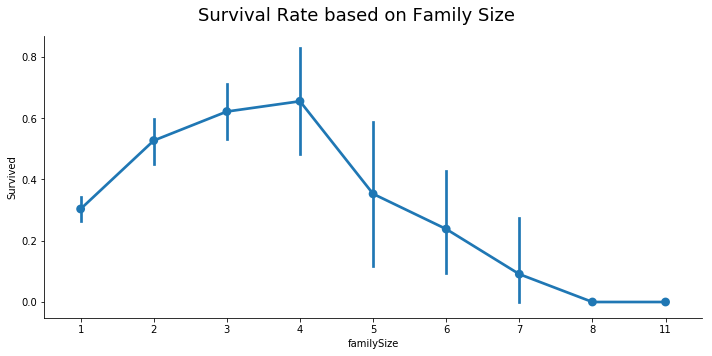

In [29]:
#factorplot showing size of the family and survuval rate

fam_size = sns.factorplot('familySize','Survived', data=df_train, aspect = 2.0, )
fam_size.fig.subplots_adjust(top=.9)
fam_size.fig.suptitle('Survival Rate based on Family Size', fontsize=18)

The factor plot shows the Survival Rate of the Passengers based on their Family Size.

Based on the graph, it shows that passengers having family size with 4 or lesser have a higher survival rate than those passengers who have a family size more than 4. It also shows that the survival rate decreases gradually when the size of passengers' family increases. 

In [30]:
# catogorize familysize into 'fam_cat'

data=[df_train,df_test]

#seperate into 4 groups 
#family size with 1- travelling alone, 2-4:small size family, 5-6: mediumm size family, >7: large size family 
fam_cat={1:'alone',2:'Small',3:'Small',4:'Small',5:'Medium',6:'Medium',7:'Large',8:'Large',11:'Large'}   

#map fam_cat and put it in new variable named 'fam_cat'
for df_famCat in data: 
    df_famCat['fam_cat']=df_famCat['familySize'].map(fam_cat)

#get the total number of passengers for each catogories 
df_train['fam_cat'].value_counts()

alone     527
Small     307
Medium     38
Large      25
Name: fam_cat, dtype: int64

Family Size are categorized into 4 groups which are 'alone', 'Small', 'Medium' and 'Large'. 

Passengers who are travelling alone are put under 'alone', passengers with family size of 2 to 4 are categorized under 'Small' family category while passengers with family size of 5 and 6 are catergorized under 'Medium' size family. Lastly, passengers with family size of more than 7 (which is 7,8 and 11) are categorized under 'Large' family category.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Survival Rate based on Family Group')

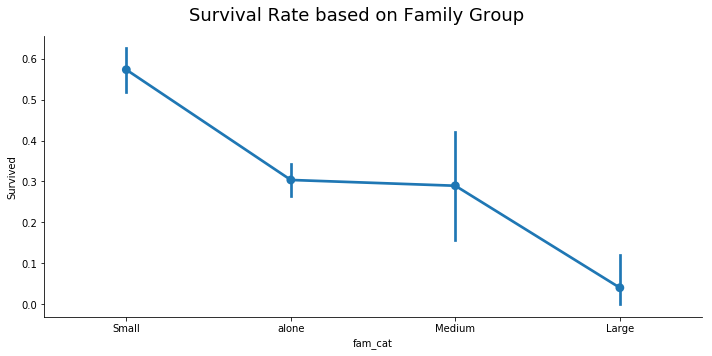

In [31]:
#factorplot-- survival rate based on family groip
fam_grp = sns.factorplot('fam_cat','Survived', data=df_train, aspect = 2.0)
fam_grp.fig.subplots_adjust(top=.9)
fam_grp.fig.suptitle('Survival Rate based on Family Group', fontsize=18)

The factor plot shows the Survival Rate of Passengers based on their Family Group. 

Based on the graph, it shows that passengers with Small family size have the highest survival rate among all the family group while passengers with Large family size have the lowest survival rate. The survival rate for passengers who aboard the Titanic alone and those who have Medium family size group are about the same. 

#### Add new feature - Deck

In [32]:
# create deck variable 

data=[df_train,df_test]

for titanic_deck in data: 
    #retrive the first letter from the Cabin column
    titanic_deck['Deck']=titanic_deck['Cabin'].astype(str).str[0]
    
#get the total number of passengers in each deck
df_train['Deck'].value_counts()

n    685
C     66
B     49
D     34
E     28
F     15
A     15
G      4
T      1
Name: Deck, dtype: int64

'Deck' feature is created. It is created from the 'Cabin' variable by extracting the first letter as the first letter in the Cabin indicates the Deck that the passengers are at. 

Above shows the range of Deck from Deck A to G and Deck T. Whereas 'n' stands for null which means passengers who don't have a deck.

Deck  Pclass
A     1          15
B     1          49
C     1          66
D     1          29
      2           5
E     1          23
      2           3
      3           2
F     2          10
      3           5
G     3           4
T     1           1
n     1          44
      2         173
      3         468
Name: Pclass, dtype: int64


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Number of Passengers in each Deck based on PClass')

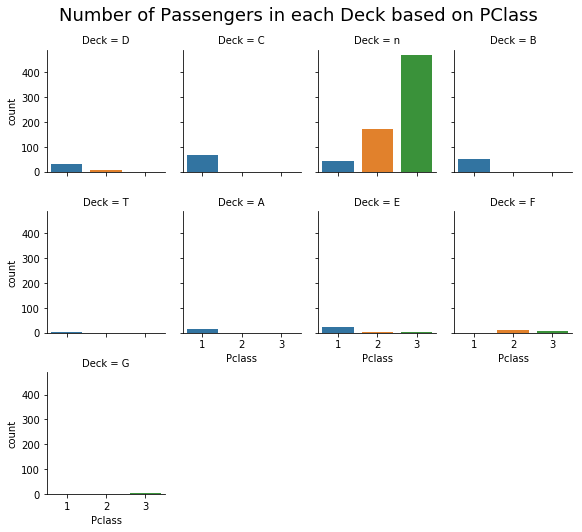

In [33]:
#show number of passengers in each deck groupby Pclass
print(df_train.groupby(['Deck', 'Pclass'])['Pclass'].count())

#factorplot - countplot showing number of passengers in each Deck 
deck=sns.factorplot("Pclass", col="Deck", col_wrap=4,data=df_train,kind="count", size=2.5, aspect=.8)
deck.fig.subplots_adjust(top=.9)
deck.fig.suptitle('Number of Passengers in each Deck based on PClass', fontsize=18)

The factor plot above shows the Number of Passengers in each Deck based on the Class.

The purpose of creating this countplot is to see which Class is classified to which Deck in the Titanic. 
- Deck A, B, C and T only contains only 1st Class passengers
- Deck D contains only 2nd Class passengers
- Deck E contains 1st, 2nd and 3rd Class passengers 
- Deck F contains 2nd and 3rd Class passengers 
- Deck G contains only 3rd Class passengers

In [34]:
#Group the deck and classified them into different group -- also known as social class

data=[df_train, df_test]

for cabin_grp in data: 
    cabin_grp['cabinGroup'] = cabin_grp['Deck']
    cabin_grp['cabinGroup'].replace(['A','B','C','T'],'Upper', inplace=True)
    cabin_grp['cabinGroup'].replace('D','Upper-Middle', inplace=True)
    cabin_grp['cabinGroup'].replace('G','Lower',inplace=True)
    cabin_grp['cabinGroup'].replace(['E','F'],'Middle',inplace=True)
    cabin_grp['cabinGroup'].replace('n', 'Unknown',inplace=True)
    
df_cabin=df_train[['Survived','cabinGroup']].groupby('cabinGroup',as_index=False).mean()
df_cabin

,cabinGroup,Survived
0,Lower,0.500000
1,Middle,0.674419
2,Unknown,0.302190
3,Upper,0.664122
4,Upper-Middle,0.676471


'cabinGroup' feature is created to split them into different cabin group which is also know as social class. 

- Deck A, B, C and T only contains only 1st Class passengers, they are grouped into Upper Class
- Deck D contains only 2nd Class passengers, they are grouped into Upper-Middle Class
- Deck E contains 1st, 2nd and 3rd Class passengers and Deck F contains 2nd and 3rd Class passengers, they are grouped into Middle Class
- Deck G contains only 3rd Class passengers, they are grouped into Lower Class
- unknown Deck is named 'Unknown' since they don't have a Cabin 

Text(0.5, 0, 'Cabin Group')

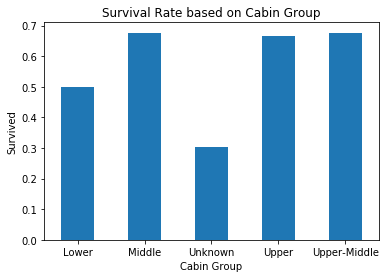

In [35]:
#bar graph - survival rate of passengers based on Cabin Group

df_cabin.plot.bar(x='cabinGroup',rot=0, legend=None)
plt.title('Survival Rate based on Cabin Group')
plt.ylabel('Survived')
plt.xlabel('Cabin Group')


The bar graph above shows the Survival Rate of Passengers based on Cabin Group. 

Based on the graph, it shows that Upper, Upper-Middle and Middle Cabin Group Class passengers have the highest survival rate among the others and the survival rate are about the same. Whereas passengers who do not have a cabin have the lowest survival rate. 

There is still a difference in survival rate between passengers from Lower Cabin Class group and the passengers from Middle or higher class Cabin Group. 

#### Add new feature - Age Group

In [36]:
# add feature - age group 

data=[df_train,df_test]

# classified the passengers into two groups, children and adults
bins = [-1,15, np.inf]
labels = [ 'Children','Adult']
for titanic_age in data: 
    titanic_age['ageGroup'] = pd.cut(titanic_age["Age"], bins, labels = labels)

#change the datatype of the variables 
df_train['ageGroup']=df_train['ageGroup'].astype('object')
df_test['ageGroup']=df_test['ageGroup'].astype('object')

#get the total number of passengers for each group
df_train['ageGroup'].value_counts()
df_test['ageGroup'].value_counts()

Adult       376
Children     36
Name: ageGroup, dtype: int64

A new feature 'ageGroup' is created, which is from 'Age' variables by using pd.cut function. 

In the feature, passengers are classified into two different groups which are 'Children' and 'Adult'. 
Passengers who are aged 15 years old or below will be classified into 'Children' group whereas passengers who are aged above 15 years old will be classified as 'Adult' group. 

ageGroup  Survived
Adult     0           515
          1           303
Children  0            34
          1            45
Name: Survived, dtype: int64


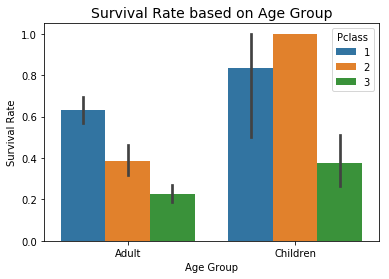

In [37]:
#show the total number of passengers in each ageGroup groupby survival rate 
print(df_train.groupby(['ageGroup', 'Survived'])['Survived'].count())

#barplot showing survival rate based on Age Group
sns.barplot(x='ageGroup',y='Survived',hue='Pclass',data=df_train)
plt.title("Survival Rate based on Age Group",fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")

plt.show()

The bar plot above shows the Survival Rate of Passenger's Class based on Age Group.

Based on the bar plot, it shows that Children have higher survival rate compared to adults. Children passengers in 3rd Class have the same survival rate as the Adult passengers in 2nd Class while the survival rate of Children passengers in the 2nd Class is higher than the Adult passengers in 1st and 2nd Class. 

#### Add new feature - Title 

In [38]:
#new feature - title of passengers 

data=[df_train, df_test]

for titanic_title in data:
    #extract only the title from 'Name' columns in the dataset
    titanic_title['Title'] = titanic_title.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
#The crosstab is divided into groups according to the Title, and the frequency of 'Sex' in each group is counted
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,3
Countess,1,0
Dr,1,5
Jonkheer,0,1
Lady,1,0
Major,0,1
Master,0,42
Miss,176,0


In [39]:
#Replace the extracted titles into bigger groupings 

titles={"Mr":0,"Miss/Mrs/Ms":1,"Master":2,"Dr/Military/Rare":3}

for titanic_title in data:
    titanic_title['Title'].replace(['Miss', 'Mrs', 'Ms', 'Mlle', 'Lady', 'Mme','Countess', 'Dona'],'Miss/Mrs/Ms',inplace=True)
    titanic_title['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don','Rev'],'Dr/Military/Rare',inplace=True)
    titanic_title['Title'].replace('Master','Master',inplace=True)
    #map the numbers on each title group 
    titanic_title['Title'] = titanic_title['Title'].map(titles)

#show survival rate of passengers of each title group 
df_title=df_train[['Survived','Title']].groupby('Title',as_index=False).mean()
df_title

,Title,Survived
0,0,0.155512
1,1,0.727273
2,2,0.523810
3,3,0.411765


Title of the passengers aboard on Titanic are extracted from the 'Name' column in the dataset and they are shown in the first table under 'Add new feature-Title' section. 

All the titles are replaced with a more general/ bigger groupings which are 'Miss/Mrs/Ms','Master' , 'Mr' and 'Dr/Military/Rare'. 

[Text(0, 0, 'Mr'),
 Text(0, 0, 'Miss/Mrs/Ms'),
 Text(0, 0, 'Master'),
 Text(0, 0, 'Dr/Military/Rare')]

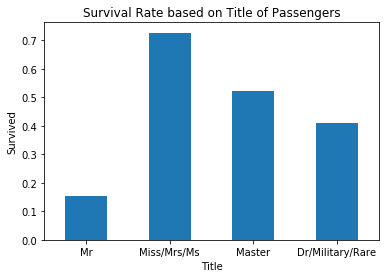

In [40]:
#bar graph showing the survival rate of passengers based on their name title 

ax_title=df_title.plot.bar(x='Title',rot=0, legend=None)
plt.title('Survival Rate based on Title of Passengers')
plt.ylabel('Survived')
plt.xlabel('Title')
titles=['Mr','Miss/Mrs/Ms','Master','Dr/Military/Rare']
ax_title.set_xticklabels(titles)

The bar graph shows the Survival Rate of Passengers based on their Name Titles. 

Based on the graph, it shows that passengers with title Miss/Mrs/Ms have the highest survival rate while passengers with title 'Mr' have the lowest survival rate. 

Master is unique title as it is given to the males below 26 years old. According to the bar graph, it is shown that passengers with title Master has the highest survival rate among all the male passengers.

#### Handling null values (Part II) 

The reason why handling 'Cabin' null value at here is because in Feature Engineering part, I wish to know the number of passengers who does not have a cabin, this is why I will do this part after that. 

In [41]:
#Handle missing value II
#Cabin 

#replace the Cabin value with No if missing and Yes if there is a cabin number
df_train['Cabin'].fillna('No', inplace=True)
df_train['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)

Text(0.5, 1.0, 'Number of Passengers with Cabin and Survival Rate')

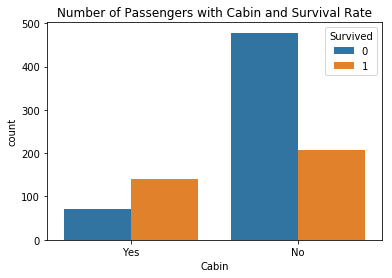

In [42]:
#countplot - Number of passengers with Cabin and Survival Rate 
sns.countplot(x=df_train['Cabin'], hue=df_train['Survived'])
plt.title('Number of Passengers with Cabin and Survival Rate')

Null values for 'Cabin' are replaced with 'No' which means that passengers does not have a cabin. While cabin value for passenger with a cabin will be replaced by 'Yes'.

The bar graph shows the Number of Passengers with Cabin and their Survival Rate. 

Based on the graph, it shows that passengers with No Cabin have a higher number of passengers who did not survive compared to the passengers with a Cabin. 

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familySize,alone,fam_cat,Deck,cabinGroup,ageGroup,Title
0,1,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,Yes,S,3,0,Small,D,Upper-Middle,Adult,1
1,2,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,Yes,C,1,1,alone,C,Upper,Adult,0
2,3,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,No,C,1,1,alone,n,Unknown,Adult,1
3,4,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,Yes,S,1,1,alone,C,Upper,Adult,1
4,5,0,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,No,C,1,1,alone,n,Unknown,Adult,0


### Data Cleansing 

In [45]:
#remove unwanted columns 
titanic_df=df_train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Age','Deck','Cabin','familySize','Fare'],axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Embarked,alone,fam_cat,cabinGroup,ageGroup,Title
0,1,1,female,S,0,Small,Upper-Middle,Adult,1
1,1,1,male,C,1,alone,Upper,Adult,0
2,1,1,female,C,1,alone,Unknown,Adult,1
3,1,1,female,S,1,alone,Upper,Adult,1
4,0,1,male,C,1,alone,Unknown,Adult,0


Before trainning the model, some of the unwanted columns will be dropped and parse into a new dataframe. 

Columns dropped are PassengerId, Name, Ticket, SibSp, Parch, Age, Deck, Cabin, familySize and Fare. 

Reasons of dropping the certain columns: 
1. PassengerId - unique ID for identifying the passengers and has no relation with other variables. 
2. Name - Since the title of passengers are extracted, 'Name' will not be used for the traning models. 
3. Ticket - Unique ticket number for every passenger and has no relation with other variables. 
4. SipSp & Parch - The number of siblings/spouse and children/parents are added up and put them in 'familySize'
5. Cabin - The first letter of the cabin number is extracted out as 'Deck' 
6. Deck - The decks are classified into different groups based on passenger's class.
7. familySize - familySize are classified into different groupings based on passengers' family size. 
8. Fare - It will decrease the accuracy of the models, hence it is dropped.

In [46]:
# Show categorical varibles and numeric variables

tnum_vars=list(titanic_df.columns[titanic_df.dtypes != "object"])
tcat_vars=list(titanic_df.columns[titanic_df.dtypes == "object"])
print("Categorical Variables: ",tcat_vars)
print("Numerical Variables: ",tnum_vars)

Categorical Variables:  ['Sex', 'Embarked', 'fam_cat', 'cabinGroup', 'ageGroup']
Numerical Variables:  ['Survived', 'Pclass', 'alone', 'Title']


The variables are classified into two categories based on their data type. Variables with 'object' datatype are grouped as 'tcat_vars' which is categorical variables where the data type of variables that are not object are grouped as 'tnum_vars' which is numerical variables.

In [47]:
#encode all the categorical variables
nonnumfeats = tcat_vars
print(nonnumfeats)

#Convert Multiple Categorical Data Columns to Numerical Data Columns using Dummy Variables
df_titanic = pd.get_dummies(titanic_df,columns=nonnumfeats)

df_titanic.head()

['Sex', 'Embarked', 'fam_cat', 'cabinGroup', 'ageGroup']


,Survived,Pclass,alone,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fam_cat_Large,fam_cat_Medium,fam_cat_Small,fam_cat_alone,cabinGroup_Lower,cabinGroup_Middle,cabinGroup_Unknown,cabinGroup_Upper,cabinGroup_Upper-Middle,ageGroup_Adult,ageGroup_Children
0,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
2,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
3,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0


All multiple categorical data columns are converted into numerical data columns using dummy variables.

# Train Model

## Split Data into Train and Test Sets

In [48]:
from sklearn.model_selection import train_test_split
y = df_titanic["Survived"].values
X = df_titanic.drop(["Survived"],axis=1).values

#split data into 80% traning set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=44)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

## Train Model with Algorithm

### Train Model with Algorithm: Decision Tree

In [50]:
dt_model = DecisionTreeClassifier() 

#fit decision tree model to the data 
dt_model.fit(X_train, y_train)

#make predictions 
Y_pred_DT = dt_model.predict(X_test)
print(dt_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_DT))
print(metrics.confusion_matrix(y_test, Y_pred_DT))

#accuracy score for both train set and test set
score_dt=round(accuracy_score(y_train, dt_model.predict(X_train))*100,2)
acc_dt=round(accuracy_score(y_test, Y_pred_DT)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_dt))
print("Accuracy score for the test set={:.2f}%".format(acc_dt))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.86      0.69      0.76        70

   micro avg       0.83      0.83      0.83       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.84      0.83      0.83       180

[[102   8]
 [ 22  48]]
Accuracy score for the train set=83.82%
Accuracy score for the test set=83.33%


The average scores for percision is 0.84, while the average score for recall and f1-score are 0.83.

Confusion Matrix:
- True positive: 100 (predicited a positive result and it was positive) 
- True negative: 48 (predicted a negative result and it was negative) 
- False positive: 8 (predicted  a positive result and it was negative) 
- False negative: 22 (predicted a negative result and it was positive) 

The accuracy score for the train set is 83.82% while the accuracy score for test set is 83.33%

###  Train Model with Algorithm: Logistic Regression

In [51]:
lr_model = LogisticRegression()

#fit logistic regression model to the data 
lr_model.fit(X_train, y_train)

#make predictions 
Y_pred_LR = lr_model.predict(X_test)
print(lr_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_LR))
print(metrics.confusion_matrix(y_test, Y_pred_LR))

#accuracy score for both train set and test set
score_lr=round(accuracy_score(y_train, lr_model.predict(X_train))*100,2)
acc_lr=round(accuracy_score(y_test, Y_pred_LR)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_lr))
print("Accuracy score for the test set={:.2f}%".format(acc_lr))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.78      0.80      0.79        70

   micro avg       0.83      0.83      0.83       180
   macro avg       0.82      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180

[[94 16]
 [14 56]]
Accuracy score for the train set=80.75%
Accuracy score for the test set=83.33%


The average score for percision, recall and f1-score are 0.83. 

Confusion Matrix:
- True positive: 94 (predicited a positive result and it was positive) 
- True negative: 56 (predicted a negative result and it was negative) 
- False positive: 16 (predicted  a positive result and it was negative) 
- False negative: 14 (predicted a negative result and it was positive) 

The accuracy score for the train set is 80.75% while the accuracy score for test set is 83.33%

###  Train Model with Algorithm: Random Forest

In [52]:
random_forest = RandomForestClassifier()

#fit random forest model to the data 
random_forest.fit(X_train, y_train)

#make predictions 
Y_pred_RF = random_forest.predict(X_test)
print(random_forest)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_RF))
print(metrics.confusion_matrix(y_test, Y_pred_RF))

#accuracy score for both test and train set
score_rf=round(accuracy_score(y_train, random_forest.predict(X_train))*100,2)
acc_rf=round(accuracy_score(y_test, Y_pred_RF)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_rf))
print("Accuracy score for the test set={:.2f}%".format(acc_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        70

   micro avg       0.84      0.84      0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

[[98 12]
 [16 54]]
Accuracy score for the train set=83.82%
Accuracy score for the test set=84.44%


The average score for percision, recall and f1-score are 0.84.

Confusion Matrix:
- True positive: 98 (predicited a positive result and it was positive) 
- True negative: 54 (predicted a negative result and it was negative) 
- False positive: 12 (predicted  a positive result and it was negative) 
- False negative: 26 (predicted a negative result and it was positive) 

The accuracy score for the train set is 83.82% while the accuracy score for test set is 84.44%

###  Train Model with Algorithm: K Nearest Neighbors 

In [53]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 

#fit KNN model to the data 
knn_model.fit(X_train, y_train)  

#make predictions 
Y_pred_KNN = knn_model.predict(X_test)  
print(knn_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_RF))
print(metrics.confusion_matrix(y_test, Y_pred_RF))

#accuracy score for both test and train set
score_knn=round(accuracy_score(y_train, knn_model.predict(X_train))*100,2)
acc_knn=round(accuracy_score(y_test, Y_pred_KNN)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_knn))
print("Accuracy score for the test set={:.2f}%".format(acc_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        70

   micro avg       0.84      0.84      0.84       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.84      0.84      0.84       180

[[98 12]
 [16 54]]
Accuracy score for the train set=80.75%
Accuracy score for the test set=80.56%


The average scores for percision, recall and f1-score are 0.84.

Confusion Matrix:
- True positive: 98 (predicited a positive result and it was positive) 
- True negative: 54 (predicted a negative result and it was negative) 
- False positive: 12 (predicted  a positive result and it was negative) 
- False negative: 16 (predicted a negative result and it was positive) 

The accuracy score for the train set is 80.75% while the accuracy score for test set is 80.56%

### Train Model with Algorithm:Naive Bayes

In [54]:
NB_model = GaussianNB() 

#fit Naive Bayes model to the data 
NB_model.fit(X_train, y_train) 

#make predictions 
Y_pred_NB = NB_model.predict(X_test)  
print(NB_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_NB))
print(metrics.confusion_matrix(y_test, Y_pred_NB))

#accuracy score for test and train set
score_nb=round(accuracy_score(y_train, NB_model.predict(X_train))*100,2)
acc_nb=round(accuracy_score(y_test, Y_pred_NB)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_nb))
print("Accuracy score for the test set={:.2f}%".format(acc_nb))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       110
           1       0.67      0.83      0.74        70

   micro avg       0.78      0.78      0.78       180
   macro avg       0.77      0.79      0.77       180
weighted avg       0.80      0.78      0.78       180

[[82 28]
 [12 58]]
Accuracy score for the train set=76.99%
Accuracy score for the test set=77.78%


The average score for percision is 0.80, while for the recall and f1-score, their average score is 0.78.

Confusion Matrix:
- True positive: 82 (predicited a positive result and it was positive) 
- True negative: 58 (predicted a negative result and it was negative) 
- False positive: 28 (predicted  a positive result and it was negative) 
- False negative: 12 (predicted a negative result and it was positive) 

The accuracy score for the train set is 76.99% while the accuracy score for test set is 77.78%

### Train Model with Algorithm: Support Vector Classifier

In [55]:
svc_model = LinearSVC()

#fit random forest model to the data 
svc_model.fit(X_train, y_train)

#prediction
Y_pred_SVC = svc_model.predict(X_test)
print(svc_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_SVC))
print(metrics.confusion_matrix(y_test, Y_pred_SVC))

#accuracy score for test and train score
score_svc=round(accuracy_score(y_train, svc_model.predict(X_train))*100,2)
acc_svc=round(accuracy_score(y_test, Y_pred_SVC)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_svc))
print("Accuracy score for the test set={:.2f}%".format(acc_svc))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       110
           1       0.80      0.80      0.80        70

   micro avg       0.84      0.84      0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180

[[96 14]
 [14 56]]
Accuracy score for the train set=81.73%
Accuracy score for the test set=84.44%


The average score for percision, recall and f1-score are 0.84.

Confusion Matrix:
- True positive: 96 (predicited a positive result and it was positive) 
- True negative: 56 (predicted a negative result and it was negative) 
- False positive: 14 (predicted  a positive result and it was negative) 
- False negative: 14 (predicted a negative result and it was positive) 

The accuracy score for the train set is 81.73% while the accuracy score for test set is 84.44%

### Trained Model with Algorithm: Gradient Boosting Classifier

In [56]:
gbc_model= GradientBoostingClassifier()

#fit random forest model to the data 
gbc_model.fit(X_train, y_train)

Y_pred_GBC = gbc_model.predict(X_test)
print(gbc_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_GBC))
print(metrics.confusion_matrix(y_test, Y_pred_GBC))

#accuracy score
score_gbc=round(accuracy_score(y_train, gbc_model.predict(X_train))*100,2)
acc_gbc=round(accuracy_score(y_test, Y_pred_GBC)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_gbc))
print("Accuracy score for the test set={:.2f}%".format(acc_gbc))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.84      0.76      0.80        70

   micro avg       0.85      0.85      0.85       180
   macro avg       0.85      0.83      0.84       180
weighted avg       0.85      0.85      0.85       180

[[100  10]
 [ 17  53]]
Accuracy score for the train set=83.68%
Accuracy score for the test set=85.00%


The average score for percision, recall and f1-score are 0.85. 

Confusion Matrix:
- True positive: 100 (predicited a positive result and it was positive) 
- True negative: 53 (predicted a negative result and it was negative) 
- False positive: 10 (predicted  a positive result and it was negative) 
- False negative: 17 (predicted a negative result and it was positive) 

The accuracy score for the train set is 83.68% while the accuracy score for test set is 85%

### Overview of all Trainned Models

In [57]:
#list out all the trained models and put them into a dataframe
models = pd.DataFrame({
    'Trainned Model': ['Logistic Regression','Random Forest','K Nearest Neighbor',
             'Naive Bayes','Support Vector Classifier','Gradient Boosting Classifier','Decision Tree'],
    'Score': [acc_lr, acc_rf, acc_knn, 
              acc_nb, acc_svc, acc_gbc, acc_dt]})
models_df = models.sort_values(by='Score', ascending=False)
models_df = models_df.set_index('Score')
models_df

,Trainned Model
Score,
85.00,Gradient Boosting Classifier
84.44,Random Forest
84.44,Support Vector Classifier
83.33,Logistic Regression
83.33,Decision Tree
80.56,K Nearest Neighbor
77.78,Naive Bayes


######  How did you select which learning algorithms to use?

The scores for all the trained models are listed in the dataFrame and being printed out.

It shows that Gradient Boosting Classifier has the highest score among all the models while Naive Bayes has the lowest score. 

Thus, I am going to pick the top three models with the highest test score which are Gradient Boosting Classifier, Support Vector Machine and Random Forest to do further model tuning/ undergo cross validation and model evaluation. 

# Score and Evaluate Model

###### How do you evaluate the quality of your system?

The quality of the model are evaluated by cross validation using k folds and using k train or test split and average the results together to know how the models perform new data set (test data). 

Next, the accuracy score of train and test set are being printed out to see the difference of the scores. This is to ensure that the data are not either overfitted or underfitted. 

Confusion Matrix is also being printed out to see the performance of the model. Hyperparameter tuning is done to improve the performance of the models as well.


Codes are as below: 

### Support Vector Classifier

#### Cross Validation 

In [129]:
#Cross validation to check overfitting

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

#compute the score 5 consecutive times with different splits 
scores_svc = cross_val_score(svc_model, X_train, y_train, cv=5, scoring = "accuracy")

print("Scores:", scores_svc)
#average of accuracy 
print("Mean:", scores_svc.mean()) 
print("Standard Deviation:", scores_svc.std())

Scores: [0.75       0.84027778 0.85416667 0.81818182 0.78873239]
Mean: 0.810271731398492
Standard Deviation: 0.037380000749051887


Cross Validation is carried out here to ensure that there is no overfitting or underfitting issues.

After the cross validation process for 5 kfolds, it found out that the scores for each fold is consistent and Support Vector Classifier (SVC) has an average accuracy of 81.03% from the cross validation score with a standard deviation of 0.03 (3%) 

This shows that the accuracy of SVC may differ plus or minus 0.03 (3%) 

According to the trained model above, SVC has scored 84.44% which is very close to 81.03%. This shows that SVC model is not either overfitted or underfitted. 

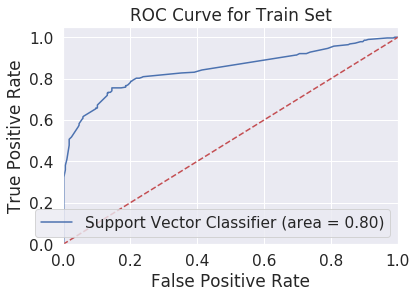

In [130]:
#show ROC curve for Train Set 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, svc_model.predict(X_train))

#false positive rate (x-axis), true positive rate(y-axis) and thresholds
fpr, tpr, thresholds = roc_curve(y_train, svc_model.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Support Vector Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Train Set for Support Vector Classifier model. 

Accuracy of the train set is measured by the area under the ROC curve. It shows that area under the train set ROC curve is 0.80. 
This shows that Train Set has 80% ability to classify the dataset correctly in predicting survival of passengers.

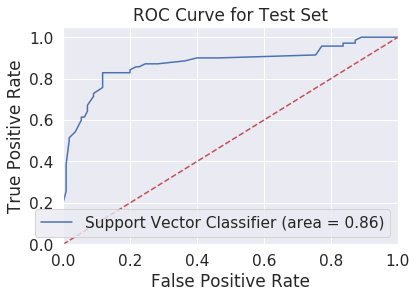

In [131]:
#Show ROC Curve for Test Set

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, svc_model.predict(X_test))

#predict probabilities for test data, and keep the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Test Set for Support Vector Classifier model. 

Accuracy of the test set is measured by the area under the ROC curve. It shows that area under the test set ROC curve is 0.86. 
This shows that Test Set has 86% ability to classify the dataset correctly in predicting survival of passengers which is 6% higher than train set.

#### Hyperparameter Tuning - GridSearchCV (SVC)

##### Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
1. I have retrieved the current parameters that I am currently using 
2. Use GridSearchCV to generate candidates from the grid of parameters to evaluate 
3. Show the best parameter values and the best combination is retained.
4. Tune the model again with the parameter values given. 

Steps are as below:

In [132]:
#check the parameters that im using currently 
svc_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [133]:
from sklearn.model_selection import GridSearchCV

#gridsearch is used to search the best grid that suits the model
svc_params = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
     }

grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=svc_params, cv=5,scoring='accuracy')

model_svc = grid_search_svc.fit(X_train, y_train)

In [134]:
#print out the best model parameters 
print(model_svc.best_params_)

{'C': 10, 'gamma': 0.01}


In [135]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_hp= SVC(C=10, gamma=0.01, probability=True)

svc_hp.fit(X_train, y_train)

scores_svc = cross_val_score(svc_hp, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_svc)
print("Mean:", scores_svc.mean())
print("Standard Deviation:", scores_svc.std())

Scores: [0.75       0.76388889 0.80555556 0.875      0.84722222 0.86111111
 0.81944444 0.77777778 0.77464789 0.8       ]
Mean: 0.8074647887323945
Standard Deviation: 0.04047443045336518


Cross Validation has done after hyperparameters tuning using GridSearch.

After the cross validation process for 10 kfolds, it found out that the scores for each fold is consistant and Support Vector Classifier (SVC) has an average accuracy of 80.75% from the cross validation score with a standard deviation of 0.04 (4%) 

This shows that the accuracy of SVC may differ plus or minus 0.04 (4%) 

In [136]:
y_hat_svc_hp_train= svc_hp.predict(X_train)
y_hat_svc_hp_test= svc_hp.predict(X_test)

# Accuracy score for train set
from sklearn.metrics import accuracy_score
score_svc = accuracy_score(y_train, y_hat_svc_hp_train)
print("Accuracy score for the train set={:.2f}%".format(score_svc*100))

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score_svc = accuracy_score(y_test, y_hat_svc_hp_test)
print("Accuracy score for the test set={:.2f}%".format(score_svc*100))

Accuracy score for the train set=80.75%
Accuracy score for the test set=85.00%


The accuracy score for train set for the tuned model is 80.75% while accuracy score for test set is 85.00%. 

Based on the Support Vector Classifier model, the original test score before the hyperparameters tuning was 84.44%, there is an increase of 0.56% on the test score. 

This indicates that the tuned SVC model has the ability to predict 85% of the survival correctly.

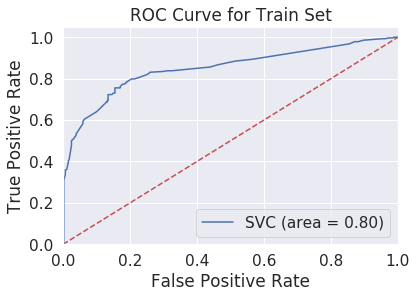

In [137]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, svc_hp.predict(X_train))

#false positive rate (x-axis), true positive rate(y-axis)
fpr, tpr, thresholds = roc_curve(y_train, svc_hp.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Train Set for Support Vector Classifier model after hyperparameter tuning. 

Accuracy of the train set is measured by the area under the ROC curve. It shows that area under the train set ROC curve is 0.80. 

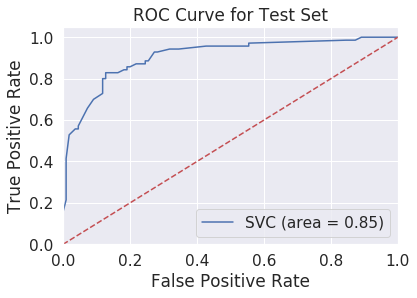

In [138]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, svc_hp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_hp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Test Set for Support Vector Classifier model after hyperparameter tuning. 

Accuracy of the test set is measured by the area under the ROC curve. It shows that area under the test set ROC curve is 0.85.
This shows that Test Set has 85% ability to classify the dataset correctly in predicting survival of passengers.

[[58 12]
 [15 95]]


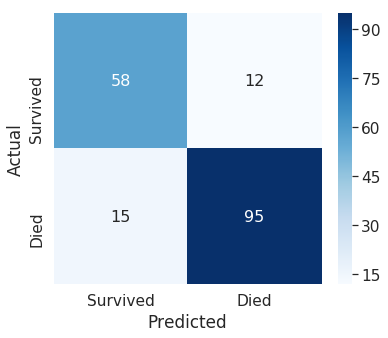

In [139]:
# visualization of the performance of the algorithm

from sklearn.metrics import confusion_matrix

# evaluate model for test set
class_names_svc=["Survived","Died"]
cm_svc = confusion_matrix(y_test, y_hat_svc_hp_test, labels=[1,0])
print(cm_svc)

df_cm_svc = pd.DataFrame(cm_svc, columns=class_names_svc, index = class_names_svc)
df_cm_svc.index.name = 'Actual'
df_cm_svc.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
#for label size
sns.set(font_scale=1.4)
# font size
sns.heatmap(df_cm_svc, cmap="Blues", annot=True,annot_kws={"size": 16})

###### Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.

The confusion matrix above describes the performance of  SVC model.

The model predicts that 58 passengers are correctly classified as survived (true positive) and 95 passengers are correctly classified as not survived (true negative).

12 passengers are wrongly classifed as not survived (false positive) while 15 passengers are wrongly classified as survived (false negative)

### Gradient Boosting Classifier

#### Cross Validation 

In [58]:
#Cross validation to check overfitting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbc= GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#compute the score 5 consecutive times with different splits 
scores_gbc = cross_val_score(gbc, X_train, y_train, cv=5, scoring = "accuracy")

print("Scores:", scores_gbc)
#average of accuracy 
print("Mean:", scores_gbc.mean()) 
print("Standard Deviation:", scores_gbc.std())


Scores: [0.76388889 0.82638889 0.82638889 0.78321678 0.77464789]
Mean: 0.7949062674414786
Standard Deviation: 0.02642511943247358


Cross Validation is carried out here to ensure that there is no overfitting or underfitting issues.

After the cross validation process for 5 kfolds, it found out that the scores for each time are consistent and Gradient Boosting Classifier (GBC) has an average accuracy of 79.5% from the cross validation score with a standard deviation of 0.02 (2%) 

This shows that the accuracy of GBC may differ plus or minus 0.03 (3%) 

According to the trained model above, GBC has scored 85% which is close to 79.5%. This shows that SVC model is not either overfitted or underfitted. 

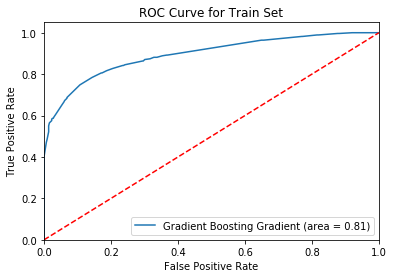

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, gbc.predict(X_train))

#false positive rate (x-axis), true positive rate(y-axis), and thresholds
fpr, tpr, thresholds = roc_curve(y_train, gbc.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Gradient (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Train Set for Gradient Boosting Gradient model. 

Accuracy of the train set is measured by the area under the ROC curve. It shows that area under the train set ROC curve is 0.81. 
This shows that Train Set has 81% ability to classify the dataset correctly in predicting survival of passengers in GBC model.

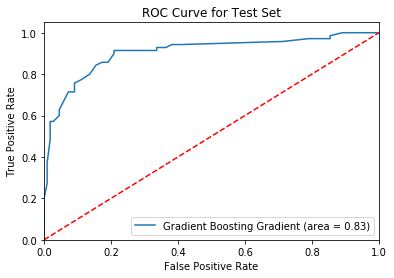

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))

#rfc.predict_proba(X_test)[:,1] ==  predict probabilities for test data, and keep the probabilities of the positive class only
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Gradient (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Test Set for Gradient Boosting Classifier model. 

Accuracy of the test set is measured by the area under the ROC curve. It shows that area under the test set ROC curve is 0.83. 
This shows that Test Set has 83% ability to classify the dataset correctly in predicting survival of passengers which is 2% higher than train set.

#### Hyperparameters Tuning - GridSearchCV (GBC) 

##### Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
1. I have retrieved the current parameters that I am currently using 
2. Use GridSearchCV to generate candidates from the grid of parameters to evaluate 
3. Show the best parameter values and the best combination is retained.
4. Tune the model again with the parameter values given. 

Steps are as below:

In [62]:
#check the parameters that im using currently 
gbc.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [71]:
from sklearn.model_selection import GridSearchCV

#list down grids for all the params for tuning 
gbc_params = {
    'learning_rate':[0.15,0.1,0.05,0.01,10,100],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2,3, 4, 5,10,50],
    'min_samples_split': [2, 4, 6],
    "min_samples_leaf" : [1, 5, 10]
}

grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=5,scoring='accuracy')

model_gbc = grid_search_gbc.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
#print out the best params 
print(model_gbc.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 200}


I did not follow exactly for the best grid search params ('min_samples_leaf' and 'min_samples_split') as I found that the model could do better with other value.

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_hp= GradientBoostingClassifier(learning_rate=0.01, 
                             n_estimators=200,
                             max_depth= 5,
                             min_samples_split=2,
                             min_samples_leaf=4)

gbc_hp.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

scores_gbc = cross_val_score(gbc_hp, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_gbc)
print("Mean:", scores_gbc.mean())
print("Standard Deviation:", scores_gbc.std())

Scores: [0.79166667 0.76388889 0.75       0.83333333 0.83333333 0.81944444
 0.83333333 0.81944444 0.78873239 0.81428571]
Mean: 0.8047462553096356
Standard Deviation: 0.028405517312121775


Cross Validation after the hyperparameter tuning is carried out here to ensure that there is no overfitting or underfitting issues.

After the cross validation process for 10 kfolds, it found out that the scores for each fold is consistent and Gradient Boosting Classifier (GBC) has an average accuracy of 80.47% for each fold from the cross validation score with a standard deviation of 0.03

This shows that the accuracy of GBC may differ plus or minus 0.03

In [105]:
y_hat_gbc_hp_train= gbc_hp.predict(X_train)
y_hat_gbc_hp_test= gbc_hp.predict(X_test)

# Accuracy score for train set
from sklearn.metrics import accuracy_score
score_gbc = accuracy_score(y_train, y_hat_gbc_hp_train)
print("Accuracy score for the train set={:.2f}%".format(score_gbc*100))

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score_gbc = accuracy_score(y_test, y_hat_gbc_hp_test)
print("Accuracy score for the test set={:.2f}%".format(score_gbc*100))

Accuracy score for the train set=83.12%
Accuracy score for the test set=85.00%


After hyperparamter tuning, the accuracy score for train set for the tunned model is 83.12% while accuracy score for test set is 85%. 

Based on the Gradient Boosting Classifier model, the original test score was 85% before the hyperparameters tuning, hence there is no increase or decrease in the test score. 

This indicates that the tunned GBC model has the ability to predict 85% of the survival correctly.

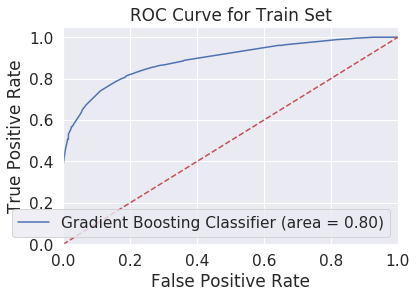

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, gbc_hp.predict(X_train))

#false positive rate (x-axis), true positive rate(y-axis)
fpr, tpr, thresholds = roc_curve(y_train, gbc_hp.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Train Set for Gradient Boosting Gradient model after hypertunning using GridSearch. 

Accuracy of the train set is measured by the area under the ROC curve. It shows that area under the train set ROC curve is 0.80. 

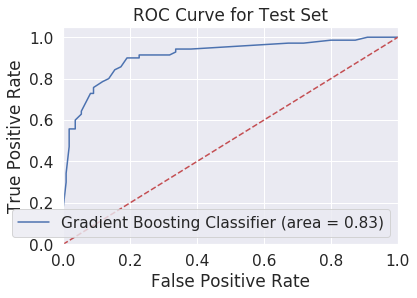

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc_hp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc_hp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Test Set for Gradient Boosting Classifier model after hyperparameter tunning. 

Accuracy of the test set is measured by the area under the ROC curve. It shows that area under the test set ROC curve is 0.83 which is 3% higher than train set ROC area under curve. 

[[ 53  17]
 [ 10 100]]


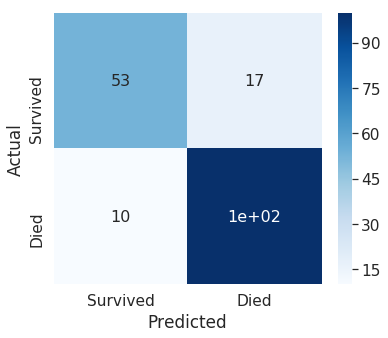

In [109]:
from sklearn.metrics import confusion_matrix

# evaluate model for test set
class_names_gbc=["Survived","Died"]
cm_gbc = confusion_matrix(y_test, y_hat_gbc_hp_test, labels=[1,0])
print(cm_gbc)

df_cm_gbc = pd.DataFrame(cm_gbc, columns=class_names_gbc, index = class_names_gbc)
df_cm_gbc.index.name = 'Actual'
df_cm_gbc.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
#for label size
sns.set(font_scale=1.4)
# font size
sns.heatmap(df_cm_gbc, cmap="Blues", annot=True,annot_kws={"size": 16})

##### Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.

The model predicts that 53 passengers are correctly classified as survived (true positive) and 100 passengers are correctly classified as not survived (true negative).

17 passengers are wrongly classified as not survived (false positive) while 10 passengers are wrongly classified as survived (false negative)

Text(0.5, 1.0, 'Feature Importance (Gradient Boosting Classifier)')

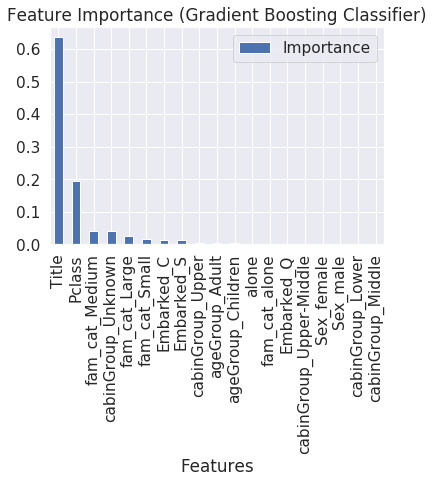

In [153]:
# Find out the features importance in GBC

feature_imp_gbc = pd.DataFrame({'Features':df_titanic.iloc[:,1:].columns,'Importance':np.round(gbc_hp.feature_importances_,3)})
#sort them in descending order 
feature_imp_gbc = feature_imp_gbc.sort_values('Importance',ascending=False).set_index('Features')
#show the top 5 features 
feature_imp_gbc.head(5)
feature_imp_gbc.plot.bar()
plt.title("Feature Importance (Gradient Boosting Classifier)")

###### Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

Based on the bar graph above, it shows the Ranking of Features Importance for Gradient Boosting Classifier to see the usefulnees of the feature in the model prediction. 

It shows that Title, Pclass and Family Category features have the highest ranking among all the features. Besides, it shows that there's a big difference between the importance rate of Title and Pclas as Title has a higher importance rate compared to Passengers' Class (Pclass) 

Thus, Title, Pclass and Family Category play an important role in the Gradient Boosting Classification model prediction, thus they are considered as important. 

### Random Forest 

#### Cross Validation

In [110]:
#Cross validation to check overfitting

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

#accuracy of random forest on titanic dataset by splitting the data, fitting a model
#and compute the score 5 consecutive times with different splits 
rfc= RandomForestClassifier()
scores_rf = cross_val_score(rfc, X_train, y_train, cv=5, scoring = "accuracy")

print("Scores:", scores_rf) 
#average of accuracy 
print("Mean:", scores_rf.mean())
print("Standard Deviation:", scores_rf.std())

Scores: [0.73611111 0.78472222 0.82638889 0.82517483 0.78169014]
Mean: 0.7908174376484236
Standard Deviation: 0.03334366381256713


Cross Validation is carried out here to ensure that there is no overfitting or underfitting issues.

After the cross validation process for 5 kfolds, it found out that the scores for each fold is consistant and Random Forest has an average accuracy of 79.08% from the cross validation score with a standard deviation of 0.03 (3%) 

This shows that the accuracy of Random Forest may differ plus or minus 0.03 (3%) 

According to the trained model above, Random Forest has scored 83.89% which is close to 79.08%. This shows that Random Forest model is not either overfitted or underfitted. 

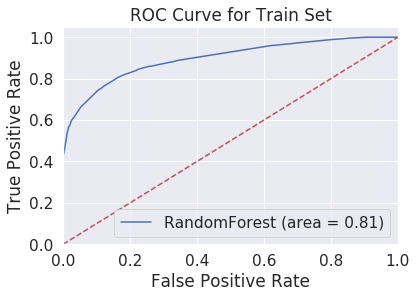

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, rfc.predict(X_train))

#false positive rate (x-axis), true positive rate(y-axis), thresholds
#predict probabilities for test data, and keep the probabilities of the positive class only
fpr, tpr, thresholds = roc_curve(y_train, rfc.predict_proba(X_train)[:,1])

plt.figure()

#plot labels (legend)
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

#x label
plt.xlabel('False Positive Rate')

#y label
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Train Set for Random Forest model.

Accuracy of the train set is measured by the area under the ROC curve. It shows that area under the train set ROC curve is 0.81. This shows that Train Set has 81% ability to classify the dataset correctly in predicting survival of passengers.

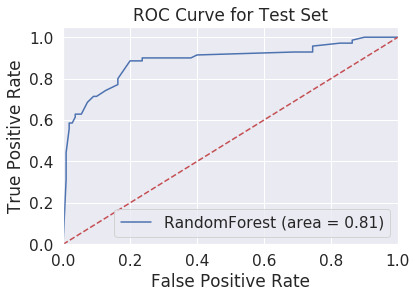

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))

#rfc.predict_proba(X_test)[:,1] ==  predict probabilities for test data, keep the probabilities of the positive class only
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Test Set for Random Forest model.

Accuracy of the test set is measured by the area under the ROC curve. It shows that area under the train set ROC curve is 0.82. This shows that Test Set has 82% ability to classify the dataset correctly in predicting survival of passengers.

#### Hyperparameter Tuning - GridSeacrhCV (Random Forest) 

##### Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
1. I have retrieved the current parameters that I am currently using 
2. Use GridSearchCV to generate candidates from the grid of parameters to evaluate 
3. Show the best parameter values and the best combination is retained.
4. Tune the model again with the parameter values given. 

Steps are as below:

In [115]:
#check the parameters that im using currently 
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [116]:
from sklearn.model_selection import GridSearchCV

#use gridsearch to find the best params 
model_params = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [2,5,10,50,100],
    'min_samples_split': [2, 4, 6],
    "min_samples_leaf" : [1, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rfc, param_grid=model_params, cv=10,scoring='accuracy')

model = grid_search_rf.fit(X_train, y_train)

In [117]:
#print out the best params 
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200}


In [122]:
from sklearn.ensemble import RandomForestClassifier

rf_hp= RandomForestClassifier(criterion='gini', 
                             n_estimators=200,
                             max_depth= 10,
                             min_samples_split=6,
                             min_samples_leaf=5,
                             n_jobs=-1)
rf_hp.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_hp, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76388889 0.76388889 0.79166667 0.86111111 0.84722222 0.875
 0.86111111 0.83333333 0.77464789 0.8       ]
Mean: 0.8171870109546167
Standard Deviation: 0.04098957243322505


Cross Validation after the hyperparameter tuning is carried out here to ensure that there is no overfitting or underfitting issues.

After the cross validation process for 10 kfolds, it found out that the scores for each fold is consistent and Random Forest has an average accuracy of 81.72% from the cross validation score with a standard deviation of 0.04 (4%)

This shows that the accuracy of Random Forest may differ plus or minus 0.04 (4%)

In [123]:
y_hat_rf_hp_train= rf_hp.predict(X_train)
y_hat_rf_hp_test= rf_hp.predict(X_test)

# Accuracy score for train set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train, y_hat_rf_hp_train)
print("Accuracy score for the train set={:.2f}%".format(score*100))

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_rf_hp_test)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the train set=82.85%
Accuracy score for the test set=83.89%


After hyperparamter tuning, the accuracy score for train set for the tunned model is 82.85% while accuracy score for test set is 83.89%.

Based on the Random Forest model, the original test score was 83.89% before the hyperparameters tuning, hence there is no decrease or increase on the test score.

This indicates that the tunned Random Forest model has the ability to predict 83.89% of the survival correctly.

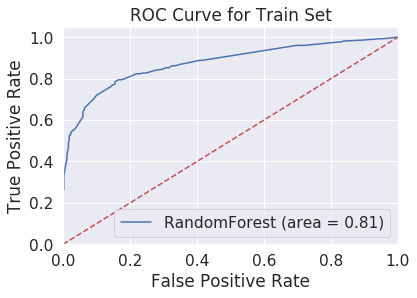

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, rf_hp.predict(X_train))

#false positive rate (x-axis), true positive rate(y-axis)
fpr, tpr, thresholds = roc_curve(y_train, rf_hp.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Train Set for Random Forest model after hypertunning using GridSearch.

Accuracy of the train set is measured by the area under the ROC curve. It shows that area under the train set ROC curve is 0.81.

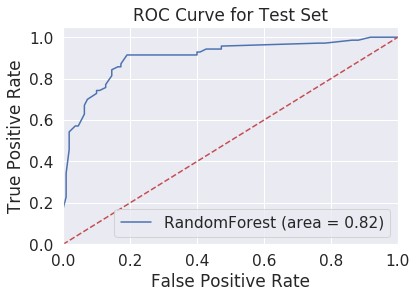

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf_hp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_hp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")

plt.show()

The graph above shows the ROC Curve for Train Set for Random Forest model after hypertunning using GridSearch.

Accuracy of the test set is measured by the area under the ROC curve. It shows that area under the test set ROC curve is 0.82 which is 1% higher than the train set ROC area under curve score.

[[52 18]
 [11 99]]


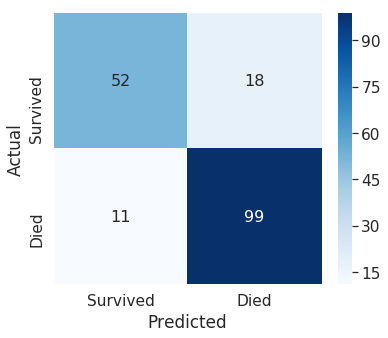

In [128]:
from sklearn.metrics import confusion_matrix

# evaluate model for test set
class_names_rf=["Survived","Died"]
cm_rf = confusion_matrix(y_test, y_hat_rf_hp_test, labels=[1,0])
print(cm_rf)

df_cm_rf = pd.DataFrame(cm_rf, columns=class_names_rf, index = class_names_rf)
df_cm_rf.index.name = 'Actual'
df_cm_rf.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
#for label size
sns.set(font_scale=1.4)
# font size
sns.heatmap(df_cm_rf, cmap="Blues", annot=True,annot_kws={"size": 16})

###### Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.

The confusion matrix above describes the performance of Random Forest model after hyperparameter tuning.

The model predicts that 52 passengers are correctly classified as survived (true positive) and 99 passengers are correctly classified as not survived (true negative).

18 passengers are wrongly classifed as not survived (false positive) while 11 passengers are wrongly classified as survived (false negative).

Text(0.5, 1.0, 'Feature Importance (Random Forest)')

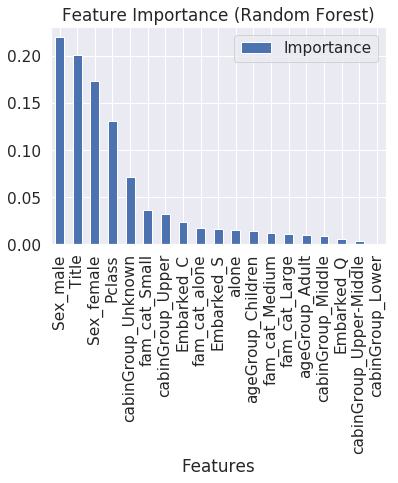

In [150]:
# Find out the features importance in Random Forest 

feature_imp_rf = pd.DataFrame({'Features':df_titanic.iloc[:,1:].columns,'Importance':np.round(rf_hp.feature_importances_,3)})
#sort them in descending order 
feature_imp_rf = feature_imp_rf.sort_values('Importance',ascending=False).set_index('Features')
#show the top 10 features 
feature_imp_rf.head(10)
feature_imp_rf.plot.bar()
plt.title("Feature Importance (Random Forest)")

###### Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)

Based on the bar graph above, it shows the Ranking of Features Importance for Random Forest to see the usefulnees of the feature in the model prediction. 

It shows that Sex, Title and Passengers Class features have the highest ranking among all the features. Thus, Sex, Title and Pclass play an important role in the Random Forest model prediction, thus they are considered as important. 

###### How well does your system compare to a stupid baseline?

Stupid baseline is a model where we predict that everyone has died in the Titanic Shipwreck which is impossible. The accuracy of the stupid baseline is around 68%. While for the model that I've created, it determines who will survive and who will perish in the shipwerck based on the features that are being implemented in the model. The accuracy of the models are above 80% which means the models are able to predict the at least 80% of survival rate of passengers correctly. 

## Data Preparation for the test.csv

In [109]:
#show the data types of each variables
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
familySize       int64
alone            int64
fam_cat         object
Deck            object
cabinGroup      object
ageGroup        object
Title            int64
dtype: object

In [110]:
# List out all variables with nulls/missing values
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          329
Embarked         0
familySize       0
alone            0
fam_cat          0
Deck             0
cabinGroup       0
ageGroup         0
Title            0
dtype: int64

In [111]:
# fill in the missing cabins
# replace the Cabin value with No if missing and Yes if there is a cabin number
df_test['Cabin'].fillna('No', inplace=True)
df_test['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)

In [112]:
# fill in the missing fare with the mean fare
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [114]:
#drop unwanted columns 
titanic_test = df_test.drop(['PassengerId','Name','Ticket','SibSp','Parch','Cabin','Age','Deck','familySize','Fare'],axis=1)
titanic_test.head(2)

,Pclass,Sex,Embarked,alone,fam_cat,cabinGroup,ageGroup,Title
0,1,male,C,0,Small,Upper,Adult,0
1,1,female,S,1,alone,Upper,Adult,1


In [115]:
# Encode all the categorical variables

predict_df = pd.get_dummies(titanic_test,columns=nonnumfeats)
predict_df.head()

,Pclass,alone,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,fam_cat_Large,fam_cat_Medium,fam_cat_Small,fam_cat_alone,cabinGroup_Lower,cabinGroup_Middle,cabinGroup_Unknown,cabinGroup_Upper,cabinGroup_Upper-Middle,ageGroup_Adult,ageGroup_Children
0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0


In [116]:
#show all the values in predict_df
Xp = predict_df.values
Xp[:2]

array([[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]])

# Prediction
### Support Vector Classifier Trained Model

In [299]:
#save the predicted model in yp_hat_svc 
yp_hat_svc = svc_hp.predict(Xp)

In [300]:
dfout_svc = pd.DataFrame() 
dfout_svc[["PassengerId"]] = df_test[["PassengerId"]]
dfout_svc["Survived"] = yp_hat_svc
dfout_svc[:5]

,PassengerId,Survived
0,6,0
1,8,1
2,9,0
3,12,1
4,14,0


### Gradient Boosting Classifier Trained Model

In [278]:
#save the predicted model in yp_hat_gbc
yp_hat_gbc = gbc_model.predict(Xp)

In [279]:
dfout_gbc = pd.DataFrame() 
dfout_gbc[["PassengerId"]] = df_test[["PassengerId"]]
dfout_gbc["Survived"] = yp_hat_gbc
dfout_gbc[:5]

,PassengerId,Survived
0,6,0
1,8,1
2,9,0
3,12,1
4,14,0


### Random Forest Trained Model

In [124]:
#save the predicted model in yp_hat_rf
yp_hat_rf = rf_hp.predict(Xp)

In [125]:
dfout_rf = pd.DataFrame() 
dfout_rf[["PassengerId"]] = df_test[["PassengerId"]]
dfout_rf["Survived"] = yp_hat_rf
dfout_rf[:5]

,PassengerId,Survived
0,6,0
1,8,1
2,9,0
3,12,1
4,14,0


In [120]:
#save the predicted model in yp_hat_svc 
yp_hat_lr = lr_model.predict(Xp)

In [122]:
dfout_lr = pd.DataFrame() 
dfout_lr[["PassengerId"]] = df_test[["PassengerId"]]
dfout_lr["Survived"] = yp_hat_lr 
dfout_lr[:5]

,PassengerId,Survived
0,6,1
1,8,1
2,9,0
3,12,1
4,14,0


# Submitting to Kaggle 

In [280]:
#export out GBC prediction 
dfout_gbc.to_csv("gbcpredict5.csv",index=False)

In [126]:
#export out Random Forest Prediction
dfout_rf.to_csv("rfpredict8.csv",index=False)

In [301]:
#export out SVC prediction  (submission.csv)
dfout_svc.to_csv("svcpredict3.csv",index=False)

# Conclusion 

According to the background of the Titanic, one of the main reason that caused such loss of life was because there were not enough lifeboats for the passengers and crews. In the process of analyzing and interpreting the data, I found that there are a few more factors that may affect the survival rate of passengers.

Chances of passengers' surviving the Titanic shipwreck were closely related to their sex, social class and age. Female passengers were more likely to survive than males. Besides that, according to the background research, women and children were given preference to lifeboats. Thus, the analysis shows that female and children have a higher survival rate than the male passengers. This has caused the men to sacrifice in the shipwreck.

Chances of survival are also related to social class/economic class of passengers as measured by the class in which the passenger travelled in the Titanic. According to the data analysis, passengers from 1st Class/paid higher fare for ticket were more likely to survive as they are given the priority to go on the lifeboats compared to the passengers from 3rd Class. Overall, it shows that there were many sociological issues and ancient culture at the era of 1912. There were three main issues that were presented, classism, sex and gender inequality.

After exploring on the data, I have built some algorithm machine learning models to predict the survival of each passenger aboard the Titanic and the top three models with the highest test score are Gradient Boosting Classifier, Support Vector Machine and Random Forest. After doing hyperparameter tuning for the top models and submitting to the Kaggle, I would choose Support Vector Classifier as the best model. This is because Support Vector Classifier has achieved an accuracy of 85% for test score after hyperparameter tuning of the model and achieved 0.82926 which is the highest among the top models in SOC Tackles Titanic on Kaggle.

# References 

https://www.bustle.com/p/the-secret-feminist-history-of-the-titanic-60622

https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic

https://www.dataquest.io/blog/kaggle-fundamentals/

https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/   (Grid Search Hyperparameter Tuning) 

https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85 (Cross Validation) 

https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019 (Classification Matrices)

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652 (Random Forest) 

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

https://humansofdata.atlan.com/2016/07/machine-learning-python/